<a href="https://colab.research.google.com/github/whacke/survey-nlp-workflow/blob/main/nlp_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import re
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction import _stop_words as sklearn_stop_words
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#split metadata columns into multiple columns and flag them T or F for every discipline or field and add to the sample_with_topics df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install plotly

In [ ]:
sample = pd.read_excel('/content/drive/My Drive/priority_questions.xlsx', sheet_name= 'Merged Questions Clean')

In [ ]:
len(sample)

250

In [ ]:
sample

,Unnamed: 0,Unnamed: 1,Keywords,Unnamed: 3,Unnamed: 4,Questions
0,Q1,[,"definition, standardization",],|,Can we develop a more standardized definition ...
1,Q2,[,"biofilms, EPS",],|,I am interested in researching mixed spp. prob...
2,Q3,[,biofilms,],|,Which interventions are effective at reducing ...
3,Q4,[,Biofilm; Autoinducers; Quorum sensing,],|,Is laundry washing at 40 deg C with regular de...
4,Q5,[,signaling pathways; mechanisms; different genera,],|,From a clinical perspective eg wounds. How can...
...,...,...,...,...,...,...
245,Q246,NaN,engineering; existing biofilm;,NaN,|,NaN
246,Q247,NaN,detection; standards; standard methods; standa...,NaN,|,NaN
247,Q248,NaN,standards; standardisation; industry regulator...,NaN,|,NaN
248,Q249,NaN,detection; monitoring; corosion; prevention;,NaN,|,NaN


In [ ]:
selection = pd.DataFrame()

In [ ]:
selection['Keywords'] = sample['Keywords']

In [ ]:
selection

,Keywords
0,"definition, standardization"
1,"biofilms, EPS"
2,biofilms
3,Biofilm; Autoinducers; Quorum sensing
4,signaling pathways; mechanisms; different genera
...,...
245,engineering; existing biofilm;
246,detection; standards; standard methods; standa...
247,standards; standardisation; industry regulator...
248,detection; monitoring; corosion; prevention;


In [ ]:
selection['Questions'] = sample['Questions']

In [ ]:
selection

,Keywords,Questions
0,"definition, standardization",Can we develop a more standardized definition ...
1,"biofilms, EPS",I am interested in researching mixed spp. prob...
2,biofilms,Which interventions are effective at reducing ...
3,Biofilm; Autoinducers; Quorum sensing,Is laundry washing at 40 deg C with regular de...
4,signaling pathways; mechanisms; different genera,From a clinical perspective eg wounds. How can...
...,...,...
245,engineering; existing biofilm;,NaN
246,detection; standards; standard methods; standa...,NaN
247,standards; standardisation; industry regulator...,NaN
248,detection; monitoring; corosion; prevention;,NaN


In [ ]:
selection = selection.fillna('Not Included')

In [ ]:
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # First we'll use regular expressions to strip out links and HTML tags
    text = re.sub(r'http[a-zA-Z0-9\&\?\=\?\/\:\.]+\b', ' ', text)
    text = re.sub(r'\<[^\<\>]+\>', ' ', text)
    # Next, let's clear out all punctuation and replace it with whitespace
    text = re.sub(r'\W+', ' ', text) 
    # And clear out numbers
    text = re.sub(r'[0-9]+', ' ', text)
    # And then lowercase
    text = text.lower()
    # This isn't going to be perfect - ideally we expand contractions first
    # And also deal with spelling corrections
    # But this will work well enough for now
    
    # Next, let's split on whitespace and then lemmatize each token
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(x) for x in tokens]
    text = " ".join(tokens)
  
    return text

In [ ]:
selection['Keywords'] = selection['Keywords'].map(clean_text)

In [ ]:
selection['Questions'] = selection['Questions'].map(clean_text)

In [ ]:
selection['ID'] = sample['Unnamed: 0']
#selection.set_index('ID', inplace=True)

In [ ]:
tag_count = list()
for x in selection['Keywords'].str.split():
    tag_count.append( len(x) )
    
print(tag_count)

[2, 2, 1, 4, 5, 2, 4, 3, 2, 4, 4, 5, 4, 2, 3, 3, 6, 3, 7, 11, 9, 9, 5, 5, 1, 9, 5, 5, 5, 4, 5, 10, 3, 4, 10, 2, 6, 11, 5, 3, 2, 2, 5, 2, 5, 3, 4, 5, 1, 2, 6, 3, 2, 4, 2, 3, 14, 3, 3, 5, 3, 11, 8, 5, 7, 5, 3, 4, 4, 4, 17, 3, 3, 3, 5, 6, 4, 8, 4, 2, 4, 6, 4, 2, 3, 2, 2, 3, 5, 3, 7, 6, 4, 9, 9, 4, 2, 6, 4, 9, 6, 2, 4, 6, 2, 7, 4, 3, 3, 6, 4, 5, 5, 5, 5, 2, 33, 6, 2, 3, 12, 5, 4, 7, 5, 2, 2, 3, 8, 9, 6, 3, 2, 5, 4, 5, 2, 3, 2, 2, 2, 4, 6, 6, 5, 7, 4, 9, 5, 2, 1, 2, 3, 4, 4, 1, 2, 5, 4, 4, 5, 6, 6, 5, 2, 4, 5, 3, 6, 6, 3, 4, 5, 7, 2, 3, 5, 6, 5, 14, 4, 3, 5, 8, 3, 5, 3, 1, 6, 4, 3, 9, 7, 4, 3, 2, 2, 3, 4, 5, 6, 2, 7, 4, 7, 5, 2, 2, 3, 2, 5, 4, 6, 5, 6, 3, 1, 2, 4, 5, 3, 4, 4, 7, 6, 3, 3, 5, 3, 8, 8, 6, 3, 4, 4, 6, 2, 7, 3, 3, 3, 10, 7, 4, 8, 3, 5, 5, 4, 4]


In [ ]:
selection

,Keywords,Questions,ID
0,definition standardization,can we develop a more standardized definition ...,Q1
1,biofilms eps,i am interested in researching mixed spp probi...,Q2
2,biofilms,which intervention are effective at reducing o...,Q3
3,biofilm autoinducers quorum sensing,is laundry washing at deg c with regular deter...,Q4
4,signaling pathway mechanism different genus,from a clinical perspective eg wound how can i...,Q5
...,...,...,...
245,engineering existing biofilm,not included,Q246
246,detection standard standard method standardiza...,not included,Q247
247,standard standardisation industry regulator re...,not included,Q248
248,detection monitoring corosion prevention,not included,Q249


In [ ]:
stop_words = set(sklearn_stop_words.ENGLISH_STOP_WORDS)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.9, # Remove any words that appear in more than 90% of our documents
    min_df=5, # Remove words that appear in fewer than 5 document
    ngram_range=(1, 1), # Only extract unigrams
    stop_words=stop_words, # Remove stopwords
    max_features=2500 # Grab the 2500 most common words (based on above constraints)
)
tfidf = tfidf_vectorizer.fit_transform(selection['Questions'])
ngrams = tfidf_vectorizer.get_feature_names()

In [ ]:
tfidf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#what words do we see the most?
ngram_df = pd.DataFrame(tfidf.todense(), columns=ngrams)
ngram_df.sum().sort_values(ascending=False)[:20]

biofilm          33.458896
biofilms         25.107674
infection        10.258615
included         10.000000
bacteria          9.089861
bacterial         8.450660
community         8.248026
antimicrobial     7.712068
cell              7.318090
surface           7.197184
formation         7.101426
matrix            6.622073
doe               6.531265
question          6.508650
microbial         6.265574
study             5.896662
method            5.696219
used              5.660761
model             5.478061
need              5.334784
dtype: float64

In [ ]:
# Define a count vectorizer that will create binary flags indicating the presence of each word
count_vectorizer = CountVectorizer(
    max_df=.9, 
    min_df=5, 
    stop_words=stop_words, 
    binary=True
)
# Transform the text into binary flags
counts = count_vectorizer.fit_transform(selection['Questions'])
# Get the names of each column
ngrams = count_vectorizer.get_feature_names()
# Compute the product to get a co-occurrence matrix
cooccurs = (counts.T * counts) 
# Fill the diagonal with zeroes
cooccurs.setdiag(0)
# Put it into a Pandas DataFrame to make it pretty
cooccurs = pd.DataFrame(cooccurs.todense(), index=ngrams, columns=ngrams)
cooccurs.head()

,able,activity,anti,antibiofilm,antibiotic,antimicrobial,application,approach,associated,bacteria,bacterial,based,best,better,biofilm,biofilms,cancer,care,catheter,cell,chemical,chronic,clinical,common,community,component,contamination,context,corrosion,create,current,data,define,defined,definition,detect,detection,develop,development,different,...,possible,presence,prevent,problem,process,produce,product,provide,question,real,reduce,regulatory,relevant,research,resistance,response,right,risk,role,situ,specie,specific,standard,standardized,state,structure,study,surface,test,testing,treatment,type,understand,use,used,vitro,vivo,water,way,world
able,0,0,0,0,0,0,0,2,0,3,0,0,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,3,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,0,1,0
activity,0,0,0,2,0,2,0,1,0,0,0,0,1,0,3,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,2,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,2,0,0,1,0,0
anti,0,0,0,0,1,1,0,1,0,1,0,0,0,0,8,2,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2,4,1,0,0,0,1,1,1,0,0
antibiofilm,0,2,0,0,0,2,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,2,0,0,0,0,0
antibiotic,0,0,1,0,0,2,0,0,0,2,1,1,0,0,6,7,0,0,0,1,0,0,1,1,1,0,2,0,0,0,0,0,0,0,0,0,2,0,1,3,...,0,1,0,1,0,0,0,0,1,1,2,0,2,1,5,0,1,1,0,0,0,1,0,0,1,0,1,3,0,0,2,0,1,0,0,0,0,0,1,1


In [ ]:
# Here's a quick little functiom to loop over a trained topic model and print off the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #{}: {}".format(
            topic_idx,
            ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        ))

# These are the Tags for the Questions we were asked

In [ ]:
lda = LatentDirichletAllocation(n_components=10, random_state=42).fit(tfidf)
# Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
# Two fun parameters to play with, that you can pass to the LDA class above:
# doc_topic_prior (alpha) - lower alpha means documents will be composed of fewer topics (higher means a more uniform distriution across all topics)
# topic_word_prior (beta) - lower beta means topics will be composed of fewer words (higher means a more uniform distribution across all words)
print("\nTopics in LDA model:")
print_top_words(lda, ngrams, 10)


Topics in LDA model:
Topic #0: surface, water, human, health, material, model, standard, impact, risk, definition
Topic #1: biofilm, biofilms, different, formation, bacterial, bacteria, immune, prevent, specific, pathogenic
Topic #2: question, test, type, need, general, antibiotic, biofilm, understand, biofilms, doe
Topic #3: infection, community, biofilms, use, biofilm, associated, microbial, interaction, cell, matrix
Topic #4: biofilm, bacteria, microbiome, biofilms, product, real, important, know, model, patient
Topic #5: included, bacterial, matrix, biofilm, extracellular, role, way, disease, infectious, component
Topic #6: antimicrobial, study, biofilm, method, testing, anti, research, effective, biofilms, development
Topic #7: biofilm, resistance, product, antibiofilm, organism, mechanism, long, anti, antimicrobial, formation
Topic #8: biofilms, used, context, chronic, specie, ha, planktonic, industry, improve, long
Topic #9: standardized, situ, regulatory, biofilm, common, deve

In [ ]:
#get topics for documents
doc_topics = pd.DataFrame(lda.transform(tfidf))

In [ ]:
topic_column_names = ["topic_{}".format(c) for c in doc_topics.columns]
doc_topics.columns = topic_column_names

In [ ]:
doc_topics

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.250089,0.034592,0.034591,0.034591,0.034599,0.034591,0.034591,0.034592,0.034589,0.473174
1,0.043323,0.043328,0.043324,0.043331,0.043326,0.043320,0.043325,0.043316,0.043349,0.610057
2,0.031937,0.031948,0.031938,0.031952,0.031938,0.031937,0.205459,0.539013,0.031942,0.031936
3,0.041701,0.041704,0.041702,0.041707,0.041703,0.041701,0.624679,0.041703,0.041701,0.041701
4,0.034470,0.689720,0.034472,0.034475,0.034484,0.034471,0.034485,0.034476,0.034476,0.034471
...,...,...,...,...,...,...,...,...,...,...
245,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000
246,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000
247,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000
248,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000


In [ ]:
#join with original dataframe
doc_topics = doc_topics.set_index(selection.index)
sample_with_topics = selection.join(doc_topics)

In [ ]:
sample_with_topics

,Keywords,Questions,ID,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,definition standardization,can we develop a more standardized definition ...,Q1,0.250089,0.034592,0.034591,0.034591,0.034599,0.034591,0.034591,0.034592,0.034589,0.473174
1,biofilms eps,i am interested in researching mixed spp probi...,Q2,0.043323,0.043328,0.043324,0.043331,0.043326,0.043320,0.043325,0.043316,0.043349,0.610057
2,biofilms,which intervention are effective at reducing o...,Q3,0.031937,0.031948,0.031938,0.031952,0.031938,0.031937,0.205459,0.539013,0.031942,0.031936
3,biofilm autoinducers quorum sensing,is laundry washing at deg c with regular deter...,Q4,0.041701,0.041704,0.041702,0.041707,0.041703,0.041701,0.624679,0.041703,0.041701,0.041701
4,signaling pathway mechanism different genus,from a clinical perspective eg wound how can i...,Q5,0.034470,0.689720,0.034472,0.034475,0.034484,0.034471,0.034485,0.034476,0.034476,0.034471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,engineering existing biofilm,not included,Q246,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000
246,detection standard standard method standardiza...,not included,Q247,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000
247,standard standardisation industry regulator re...,not included,Q248,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000
248,detection monitoring corosion prevention,not included,Q249,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000


In [ ]:
only_topics = pd.DataFrame(sample_with_topics)

In [ ]:
only_topics

,Keywords,Questions,ID,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,definition standardization,can we develop a more standardized definition ...,Q1,0.250089,0.034592,0.034591,0.034591,0.034599,0.034591,0.034591,0.034592,0.034589,0.473174
1,biofilms eps,i am interested in researching mixed spp probi...,Q2,0.043323,0.043328,0.043324,0.043331,0.043326,0.043320,0.043325,0.043316,0.043349,0.610057
2,biofilms,which intervention are effective at reducing o...,Q3,0.031937,0.031948,0.031938,0.031952,0.031938,0.031937,0.205459,0.539013,0.031942,0.031936
3,biofilm autoinducers quorum sensing,is laundry washing at deg c with regular deter...,Q4,0.041701,0.041704,0.041702,0.041707,0.041703,0.041701,0.624679,0.041703,0.041701,0.041701
4,signaling pathway mechanism different genus,from a clinical perspective eg wound how can i...,Q5,0.034470,0.689720,0.034472,0.034475,0.034484,0.034471,0.034485,0.034476,0.034476,0.034471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,engineering existing biofilm,not included,Q246,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000
246,detection standard standard method standardiza...,not included,Q247,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000
247,standard standardisation industry regulator re...,not included,Q248,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000
248,detection monitoring corosion prevention,not included,Q249,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000


In [ ]:
only_topics = only_topics.groupby("Questions").mean()#.mean()[sample_with_topics.columns] #was Ratio

In [ ]:
only_topics

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
Questions,,,,,,,,,,
a healthy gut microbiome is associated with plant based diet food is a healthy microbiome associated with microbe forming biofilms on digested plant based structure if yes what is the role of those biofilms in gut health,0.364655,0.426510,0.026101,0.026111,0.026113,0.026106,0.026101,0.026101,0.026102,0.026100
a panoply of method to incorporate immobilize graft etc antibiotic and biocides to solid surface including particle ha been reported in the literature the goal is to avoid biofilm growth by hindering adhesion or inactivating microbe explanation for how they act are scarce and partially unproven release is a simple explanation but it is far from universally valid which are the detailed mechanism of those antimicrobial when attached to surface a compared to those compound free in solution if the mechanism are different do microbe respond differently doe immobilization eliminate or substantially reduce the development of antimicrobial resistance,0.302437,0.134974,0.021629,0.021629,0.021650,0.021626,0.021632,0.411174,0.021625,0.021624
a whole zoo of mathematical description of biofilms on the colony scale have been proposed in the last year how do they relate to each other which model framework are suitable for which type of question,0.034197,0.034180,0.692374,0.034177,0.034192,0.034175,0.034175,0.034174,0.034180,0.034175
aequor discovered novel remedy for agro industrial and medical biofilm over the past year while industrial professional are very knowlegable about biofilm pharma industry professional and investor are not even though biofilm play acritical role in bacterial and fungal infection and disease one of the main problem we see is that the word biofilm ha not been publicized and is described a slime extracellular matrix or persister cell casing which is confusing and inaccurate i wa an invited speaker at the un high level meeting on amr in where my mentioned of biofilm wa met with blank stare aequor support any effort on your part to publicize the name biofilm and it impact particularly with regard to antimicrobial resistance amr,0.021395,0.021357,0.021357,0.021368,0.021358,0.469433,0.021360,0.359647,0.021369,0.021355
another test question,0.041454,0.041454,0.626914,0.041454,0.041454,0.041454,0.041454,0.041454,0.041454,0.041454
...,...,...,...,...,...,...,...,...,...,...
why ha not acoustic shock wave still been used to blast out bio film yet,0.041429,0.041426,0.041425,0.041425,0.041425,0.041426,0.041426,0.041435,0.627155,0.041428
why have anti microbial resistance amr gene been discovered in the artic the global distribution longevity and transmissibility of microplastics harbouring biofilms could account for why amr gene have been discovered here do microplastics enhance the acquisition and transmission of amr and aberrant specie,0.031504,0.031502,0.031502,0.031514,0.031501,0.031502,0.031507,0.512480,0.235486,0.031501
why pseudomonas aeruginosa need two type of polysaccharide psl and pel for biofilm formation,0.034559,0.034579,0.688932,0.034559,0.034563,0.034561,0.034560,0.034569,0.034558,0.034560


In [ ]:
sample_with_topics['Group']= sample_with_topics[['topic_0','topic_1','topic_2','topic_3','topic_4','topic_5','topic_6','topic_7','topic_8','topic_9']].idxmax(axis=1)

In [ ]:
sample_with_topics['Max']= sample_with_topics[['topic_0','topic_1','topic_2','topic_3','topic_4','topic_5','topic_6','topic_7','topic_8','topic_9']].max(axis=1)

In [ ]:
sample_with_topics

,Keywords,Questions,ID,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,Group,Max
0,definition standardization,can we develop a more standardized definition ...,Q1,0.250089,0.034592,0.034591,0.034591,0.034599,0.034591,0.034591,0.034592,0.034589,0.473174,topic_9,0.473174
1,biofilms eps,i am interested in researching mixed spp probi...,Q2,0.043323,0.043328,0.043324,0.043331,0.043326,0.043320,0.043325,0.043316,0.043349,0.610057,topic_9,0.610057
2,biofilms,which intervention are effective at reducing o...,Q3,0.031937,0.031948,0.031938,0.031952,0.031938,0.031937,0.205459,0.539013,0.031942,0.031936,topic_7,0.539013
3,biofilm autoinducers quorum sensing,is laundry washing at deg c with regular deter...,Q4,0.041701,0.041704,0.041702,0.041707,0.041703,0.041701,0.624679,0.041703,0.041701,0.041701,topic_6,0.624679
4,signaling pathway mechanism different genus,from a clinical perspective eg wound how can i...,Q5,0.034470,0.689720,0.034472,0.034475,0.034484,0.034471,0.034485,0.034476,0.034476,0.034471,topic_1,0.689720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,engineering existing biofilm,not included,Q246,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,topic_5,0.550000
246,detection standard standard method standardiza...,not included,Q247,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,topic_5,0.550000
247,standard standardisation industry regulator re...,not included,Q248,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,topic_5,0.550000
248,detection monitoring corosion prevention,not included,Q249,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,topic_5,0.550000


# Agglomerative/Hierarchical Clustering

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.25, # Focus on less common, more unique words
    min_df=5, 
    ngram_range=(1, 1), 
    stop_words=stop_words, 
    max_features=200 # <- smaller set of words
)
tfidf = tfidf_vectorizer.fit_transform(selection['Questions'])
ngrams = tfidf_vectorizer.get_feature_names()

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

# We'll use cosine similarity to get word similarities based on document overlap
# This produces a matrix of every word compared to every other word
# With a value of 0 - 1, indicating how often they occur together in the same documents
# To get document similarities in terms of word overlap, just drop the .transpose()!
similarities = cosine_similarity(tfidf.transpose()) 
distances = 1 - similarities # Converts to distances
clusters = linkage(distances, method='ward') # Run hierarchical clustering on the distances

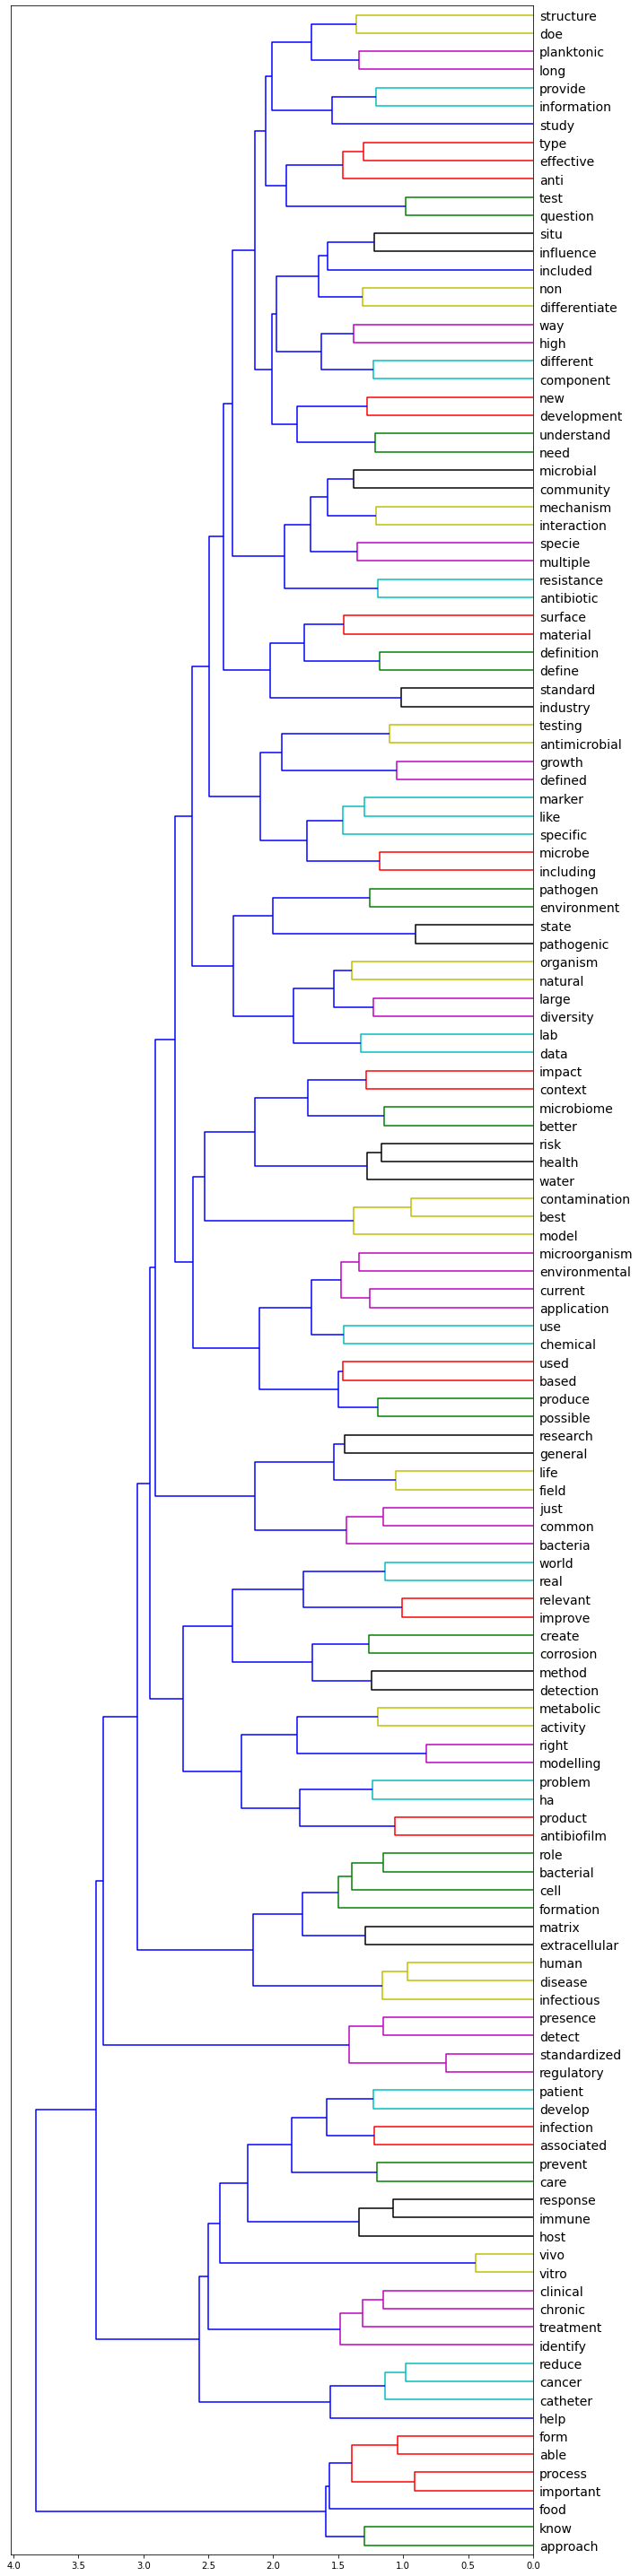

In [ ]:
fig, ax = plt.subplots(figsize=(10, 40))
ax = dendrogram(
    clusters, 
    labels=ngrams, 
    orientation="left", 
    leaf_font_size=14, 
    color_threshold=1.5
)
plt.tight_layout()

In [ ]:
import plotly.graph_objects as go

In [ ]:
bubble = go.Figure(data=[go.Scatter(
    x=sample_with_topics['ID'],
    y=sample_with_topics['Group'],
    mode='markers',
    marker=dict(
        size=sample_with_topics['Max'],
        sizemode='area',
        sizeref=2.*max(sample_with_topics['Max'])/(40.**2),
        sizemin=4
    )
)])

In [ ]:
bubble.show()

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

In [ ]:
features = sample_with_topics.loc[:,'topic_0':'topic_9']
tsne = TSNE(n_components=3, random_state = 0)
projections = tsne.fit_transform(features,)

In [ ]:
fig_3d = px.scatter_3d(projections, x=sample_with_topics['ID'],y=sample_with_topics['Group'],z=sample_with_topics['Max'],color=sample_with_topics['Group'],labels={'color':'Group'})
fig_3d.update_traces()
fig_3d.show()

In [ ]:
#treemap = px.treemap(sample_with_topics, title='Grouped Questions', path = ['ID', 'Group'], color='Max', color_continuous_scale=px.colors.sequential.Sunsetdark)

In [ ]:
#treemap.show()

In [ ]:
bubble_2 = px.scatter(sample_with_topics, x = 'ID', y='Group', size='Max',color='Max',size_max=20,template='plotly_white', labels={'Max':'Confidence'}, color_continuous_scale=px.colors.sequential.Sunsetdark)
bubble_2.update_traces(marker=dict(line=dict(width=1,color='Gray')))
bubble_2.show()

In [ ]:
def df_to_plotly(df):
    return {'z': df.values.tolist(),
            'x': df.columns[:-1].tolist(),
            'y': df['ID'].tolist()}

In [ ]:
heatmap = go.Figure(data=go.Heatmap(df_to_plotly(sample_with_topics[['topic_0','topic_1','topic_2','topic_3','topic_4','topic_5','topic_6','topic_7','topic_8','topic_9','ID']])))
heatmap.show()

In [ ]:
mega_string = ''
for entry in sample_with_topics['Questions']:
  mega_string = mega_string + entry

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
cloud = WordCloud().generate(mega_string)

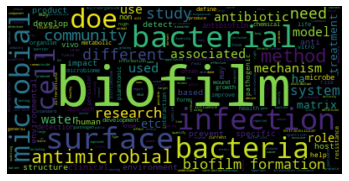

In [ ]:
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()